<font size ="8"> <div align="center"><div class="alert alert-primary alert-success">**Customer Profiling using Descriptive Statistics**</div></font>
<font size ="5"> <div align="center"><div class="alert alert-primary alert-success">By **Jon Nyner Gavan**</div></font>

-----
# **Context of the Case Study (CardioGood Fitness)**
-----

<p align = "justify"> The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by <b>CardioGood Fitness</b>. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGood Fitness retail store during the prior three months.

The data are stored in the CardioGoodFitness.csv file. And, the team identifies the following customer variables to study: </p>

-----
## **Data Description**
-----

  - Product purchased, TM195, TM498, or TM798.
  - Gender.
  - Age, in years.
  - Education, in years.
  - Relationship status, single or partnered.
  - Annual household income.
  - Average number of times the customer plans to use the treadmill each week.
  - Average number of miles the customer expects to walk/run each week.
  - And self-rated fitness on a 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

-----
## **Goal of the Study**
-----

<p align = "justify"> The main objective of this project is to <b>use Statistics concepts</b> to <b>carry out descriptive analytics</b> and <b>create a customer profile summary</b> for each CardioGood Fitness treadmill product line. </p>

### **Importing the Python librares needed for the Analysis**

In [1]:
# Load the necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Mounting google drive to import CSV data file

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the Cardio Dataset from Google Drive

mydata = pd.read_csv('/content/drive/MyDrive/Classroom/Data Science/MIT Summer School/2 Foundations of Data Science/1 Python for Data Science/1 Case Study/CardioGoodFitness.csv')

### **Taking a quick look at the data**

In [4]:
# Quick look at the first 5 entries of the Dataset

mydata.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [6]:
# Taking 5 random samples out of the Dataset

mydata.sample(n=5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
134,TM498,38,Male,16,Partnered,3,3,59124,106
112,TM498,29,Female,14,Partnered,3,3,51165,95
106,TM498,25,Female,14,Single,2,2,45480,42
78,TM195,47,Male,16,Partnered,4,3,56850,94
163,TM798,28,Male,18,Partnered,7,5,77191,180


<p align = "justify">
<b>From the initial look at the Data:</b>

*   The Dataset is composed of 3 Categorical Columns while the rest are numerical values
*   Customers are classified into two Genders
*   Three kinds of products are visible (TM498, TM195, TM798)
*   Marital Status can either be Partnered or Single</p>





### **Getting a closer look at the entries**

In [7]:
# Checking the shape of the Data

print("This data has", mydata.shape[0],"rows, and", mydata.shape[1],"columns.")

This data has 180 rows, and 9 columns.


In [8]:
# Checking for missing values and the Data types of each feature

mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**From the results:**

*   There are a total of 180 entries
*   There are no Missing Values



### **Customer Profiling**

In [9]:
# Generating Summary Statistics of the Data

mydata.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


**Observations:**

*   The TM195 product is the most popular
*   There are more male customers compared to females
*   Over half of the customers are Partnered
*   The average age of Customers is around 29 years old
*   Customers use the products ~3x a week and run for a weekly average of 103 miles
*   Self-evaluated fitness of customers average around 3.3 out of 5





**Taking a closer look at the Numerical data columns**

Histograms can be a good way to get an Idea of the distributions of each feature

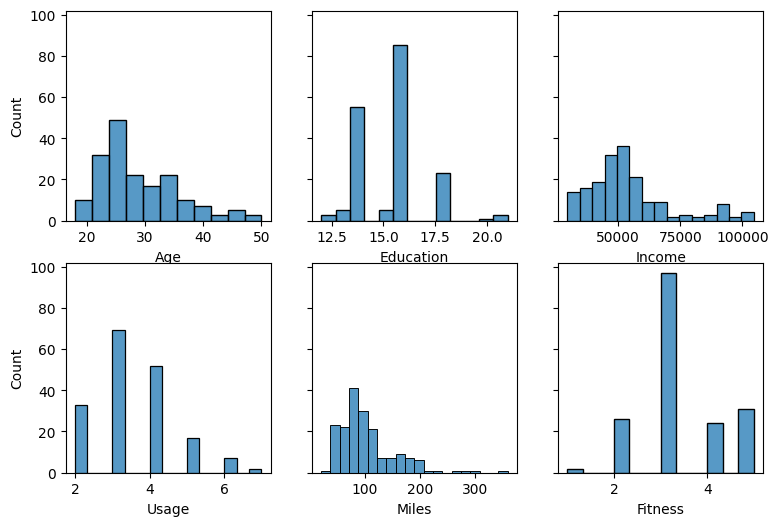

In [40]:
# Plotting Histograms of Numerical Columns

f, axs = plt.subplots(2,3, figsize = (9,6), sharey = True)
num_col1 = ['Age','Education','Income']
num_col2 = ['Usage','Miles','Fitness']

for feature in num_col1:
    sns.histplot(data = mydata, x = feature, ax = axs[0,num_col1.index(feature)])
for feature in num_col2:
    sns.histplot(data = mydata, x = feature, ax = axs[1,num_col2.index(feature)])


<p align = "justify">
<b>Observations:</b>

*   Age of customers range from around **20 to 50 years old** but **majority of them are below 35**
*   **Most** of the customers had around **16 years of education**
*   While some customers earn up to 100,000 USD, the **majority earns below 75,000**
*   **Most Customers** use the product around **3-4 times per week,** while others use more than 6 times.
*   While self-ratings of fitness are mostly at 3, there are customers who rate themeselves with perfect (5) and near-perfect (4) fitness.</p>







**Taking a closer look at categorical data columns**

Similarly, barplots can be used to get a general idea about the Categorical data

<Axes: xlabel='MaritalStatus', ylabel='count'>

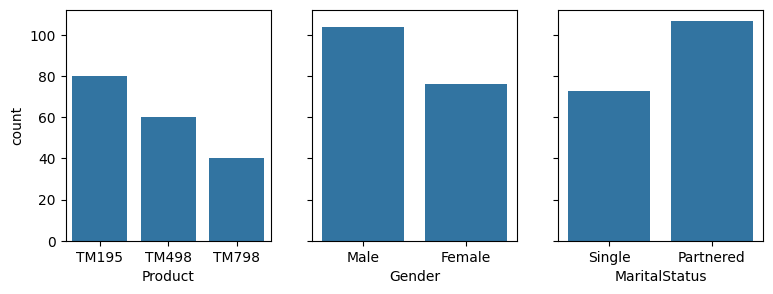

In [15]:
# Generating countplots of Categorical data

f, axs = plt.subplots(1,3, figsize = (9, 3), sharey = True)

sns.countplot(data = mydata, x = 'Product', ax = axs[0])
sns.countplot(data = mydata, x = 'Gender', ax = axs[1])
sns.countplot(data = mydata, x = 'MaritalStatus', ax = axs[2])


**Observations**


*   TM195 is the most popular product, followed by TM498, and lastly TM798
*   Male customers are ~20% more than Female customers while Single customers are around ~23% fewer.



**Examining the relationships between Customer Features and Product Usage**

Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33
MaritalStatus  Partnered  Single
Product                         
TM195                 48      32
TM498                 36      24
TM798                 23      17


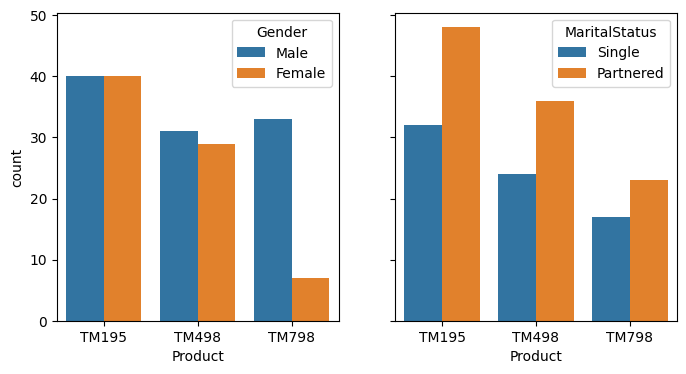

In [26]:
# Profiling the products availed according to Customer Gender and Marital Status

f, axs = plt.subplots(1,2, figsize = (8,4), sharey = True)

sns.countplot(data = mydata, x = "Product", hue = "Gender", ax = axs[0])
sns.countplot(data = mydata, x = "Product", hue = "MaritalStatus", ax = axs[1])
print(pd.crosstab(mydata['Product'],mydata['Gender'] ))
print(pd.crosstab(mydata['Product'],mydata['MaritalStatus'] ))

**Observations**

*   For products TM195 and TM498, the customers' gender distribuion is around the same. However, there is a stark difference for the TM798 product where the customers are mostly Males
*   For all products, there are more Partnered customers compared to Single



In [46]:
'''Generating a pivot table showing average values of Age, Education, Self-rated Fitness, Income, Miles,
and Usage, broken down according to Age, Product Type, and Marital Status'''


pd.pivot_table(mydata, index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus']).T

Product                         TM195                       TM498  \
Gender                         Female          Male        Female   
          MaritalStatus                                             
Age       Partnered         28.333333     31.380952     30.000000   
          Single            28.692308     25.631579     28.142857   
Education Partnered         14.888889     15.428571     15.200000   
          Single            15.538462     14.473684     15.214286   
Fitness   Partnered          2.851852      2.857143      2.933333   
          Single             2.923077      3.263158      2.785714   
Income    Partnered      46153.777778  50028.000000  49724.800000   
          Single         45742.384615  43265.842105  48920.357143   
Miles     Partnered         74.925926     80.190476     94.000000   
          Single            78.846154     99.526316     80.214286   
Usage     Partnered          2.851852      3.285714      3.333333   
          Single             3.000000      3.263158      2.928571   

Product                                       TM798                
Gender                           Male        Female          Male  
          MaritalStatus                                            
Age       Partnered         30.380952     29.000000     30.000000  
          Single            25.200000     24.333333     28.928571  
Education Partnered         15.285714     17.500000     17.421053  
          Single            14.500000     18.333333     16.928571  
Fitness   Partnered          2.904762      5.000000      4.631579  
          Single             3.000000      4.000000      4.642857  
Income    Partnered      49378.285714  84972.250000  81431.368421  
          Single         47071.800000  58516.000000  68216.428571  
Miles     Partnered         87.238095    215.000000    176.315789  
          Single            91.100000    133.333333    147.571429  
Usage     Partnered          2.857143      5.250000      4.842105  
          Single             3.300000      4.666667      4.571429

<Axes: xlabel='MaritalStatus', ylabel='Age'>

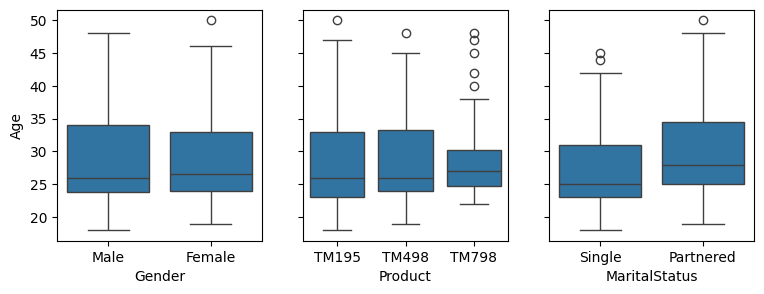

In [55]:
# Getting an Age profile of Customers sorted by Gender, Product Availed, and Marital Status

f, axs = plt.subplots(1,3, figsize = (9,3), sharey = True)

sns.boxplot(data = mydata, x = "Gender", y = "Age", ax = axs[0])
sns.boxplot(data = mydata, x = "Product", y = "Age", ax = axs[1])
sns.boxplot(data = mydata, x = "MaritalStatus", y = "Age", ax = axs[2])

<Axes: xlabel='MaritalStatus', ylabel='Income'>

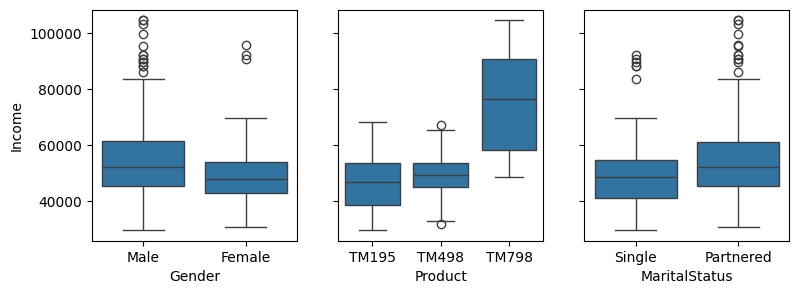

In [58]:
# etting an Income profile of Customers sorted by Gender, Product Availed, and Marital Status

f, axs = plt.subplots(1,3, figsize = (9,3), sharey = True)

sns.boxplot(data = mydata, x = "Gender", y = "Income", ax = axs[0])
sns.boxplot(data = mydata, x = "Product", y = "Income", ax = axs[1])
sns.boxplot(data = mydata, x = "MaritalStatus", y = "Income", ax = axs[2])

<Axes: xlabel='Usage', ylabel='count'>

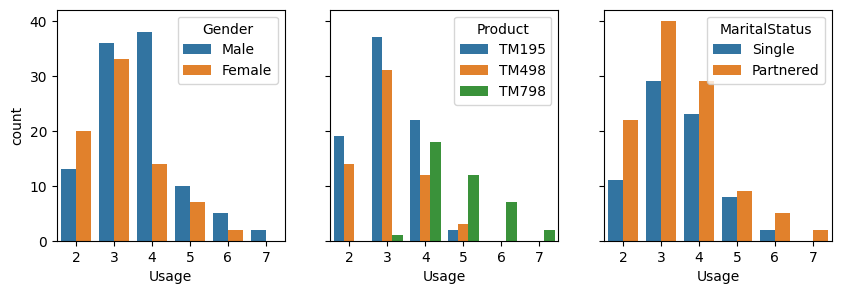

In [76]:
# Getting a closer look at the weekly product usage of Customers

f, axs = plt.subplots(1,3, figsize = (10,3), sharey = True)

sns.countplot(data = mydata, x = "Usage", hue = "Gender", ax = axs[0])
sns.countplot(data = mydata, x = "Usage", hue = "Product", ax = axs[1])
sns.countplot(data = mydata, x = "Usage", hue = "MaritalStatus", ax = axs[2])

<Axes: xlabel='MaritalStatus', ylabel='Miles'>

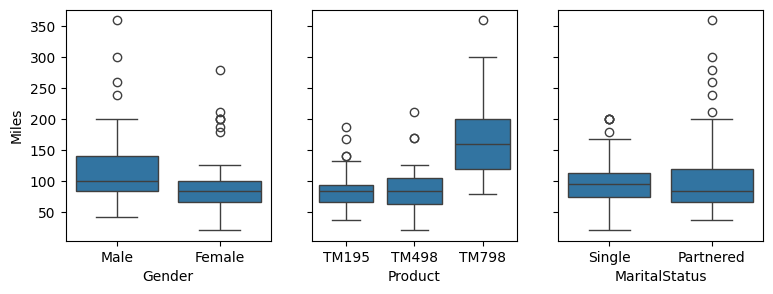

In [68]:
# Generating a profile of Miles run by customers

f, axs = plt.subplots(1,3, figsize = (9,3), sharey = True)

sns.boxplot(data = mydata, x = "Gender", y = "Miles", ax = axs[0])
sns.boxplot(data = mydata, x = "Product", y = "Miles", ax = axs[1])
sns.boxplot(data = mydata, x = "MaritalStatus", y = "Miles", ax = axs[2])

<Axes: xlabel='Fitness', ylabel='count'>

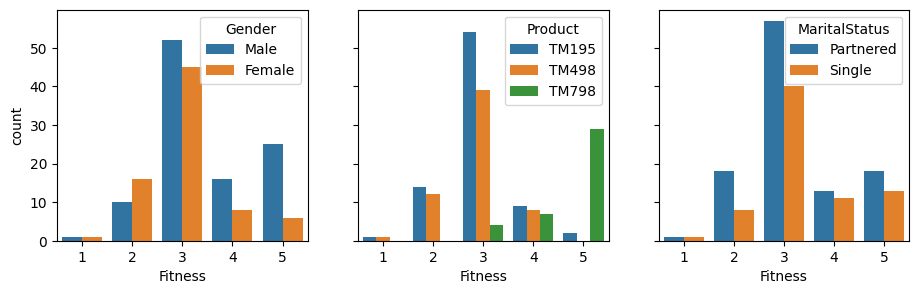

In [74]:
# Getting a closer look at the Customers' self-evaluated fitness ratings

f, axs = plt.subplots(1,3, figsize = (11,3), sharey = True)

sns.countplot(data = mydata, x = "Fitness", hue = "Gender", ax = axs[0])
sns.countplot(data = mydata, x = "Fitness", hue = "Product", ax = axs[1])
sns.countplot(data = mydata, x = "Fitness", hue = "MaritalStatus", ax = axs[2])

<p align = "justify">
<b>Observations:</b>


*   Customers who have availed product TM798 have a narrow Age Distribution and is comprised mostly of 25-27 year olds.
*   Customers who have availed the TM798 product have higher income  compared to those who have availed the other two products
*   Customers who have availed TM798 product use the product more than 4 times per week. This also allows them to run more miles on average to other customers. Almost all customers who have self-evaluated as having perfect fitness are of this segment

</p>



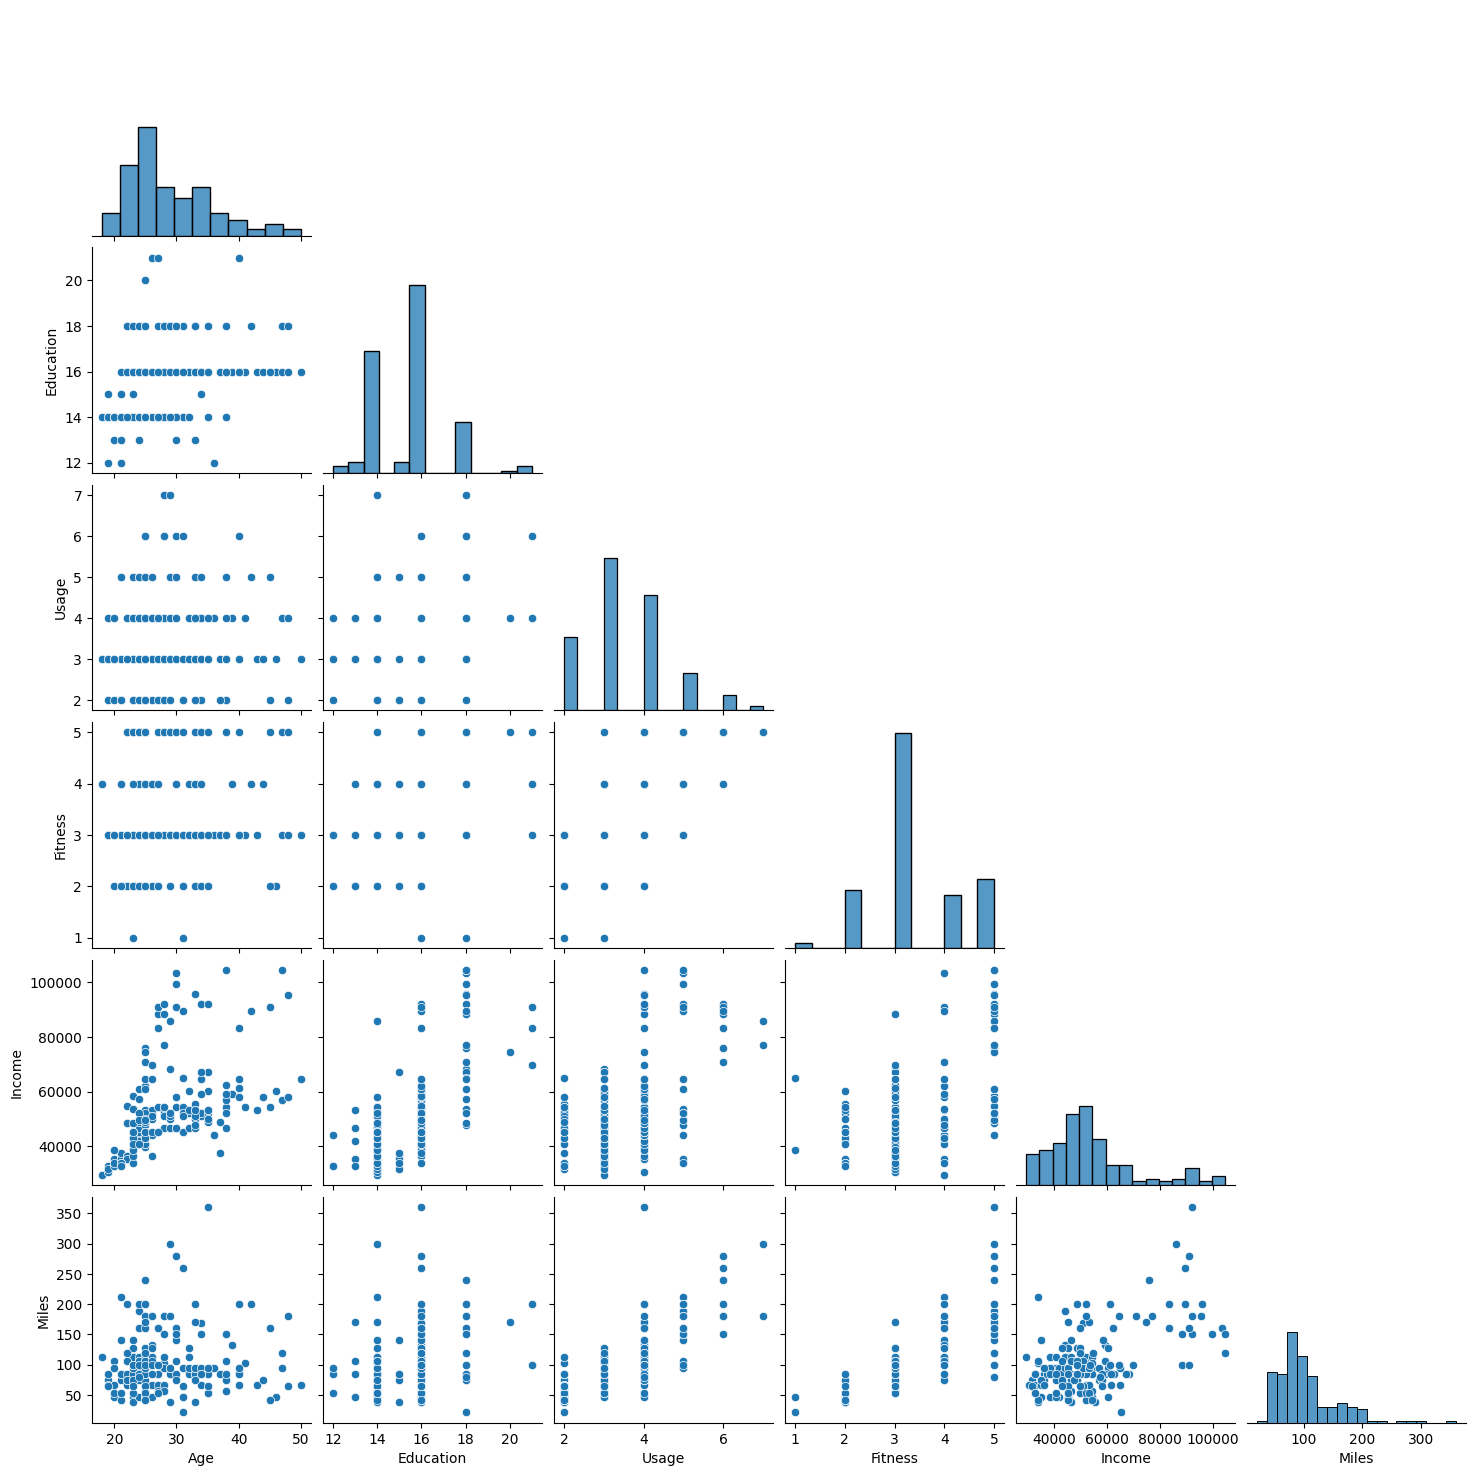

In [17]:
# Checking if there are correlations between Numerical Features

sns.pairplot(mydata, corner = True)

<p align = "justify">
<b>Observations:</b>

*   From a cursory look at the scatterplots between each numeric feature, correlation can be observed between Miles-Fitness, Miles-Usage, Income-Age
*   To get a clearer idea, correlation can be quantified
</p>


In [ ]:
# Calculating the actually correlation coefficients between numerical features

corr = mydata.corr()
corr

<ipython-input-24-7be07485a633>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = mydata.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Axes: >

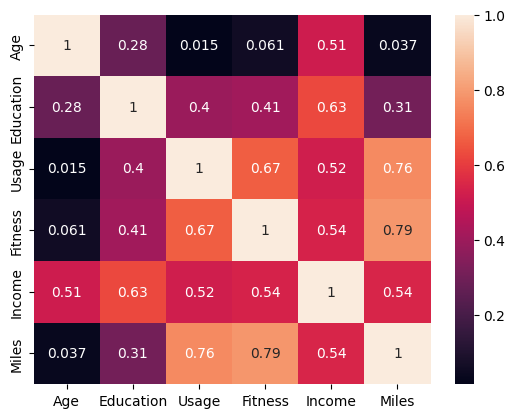

In [ ]:
# Visualizing Correlation Coefficient Results in a Heatmap

sns.heatmap(corr, annot=True)

**Observations:**


*   From the heatmap, features with higher than 0.5 correlation are indeed Miles-Usage, Miles-Fitness, Fitness-Usage, Fitness-Age
*   We can train a Linear model capturing the correlation between Miles and Usage/Fitness features



In [77]:
# Simple Linear Regression

#Load function from sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

y = mydata['Miles']
x = mydata[['Usage','Fitness']]

# Train the model using the training sets
regr.fit(x,y)

LinearRegression()

In [78]:
regr.coef_

array([20.21486334, 27.20649954])

In [79]:
regr.intercept_

np.float64(-56.74288178464862)

From the Results of the Regression,

<b>MilesPredicted = - 56.74 + 20.21 * Usage + 27.20 * Fitness</b>

As correlation coefficients for both features are positive indicating that Predicted Miles inrease with increasing Usage and/or Fitness rating.

## Summary and Insights

*   Majority of the Customers are under 35 years and averaging ~29 years old
*   More than half of the customers are Partnered
*   Customers use their product 3x per week on average
*   Customers who availed TM798 Product are shown to generally have higher income compared to others.
*   TM798 customers also comprise the majority of those who use their product more than 4x a week and is seen to run longer miles. This reflects in their higher self-evaluated fitness rating
  

